# 머신러닝 - KNN 최근접이웃 - 회귀
  

**2019-2023 [FinanceData.KR]()**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# 데이터 생성
x, y = make_regression(n_samples=40, n_features=1, noise=30, random_state=0)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

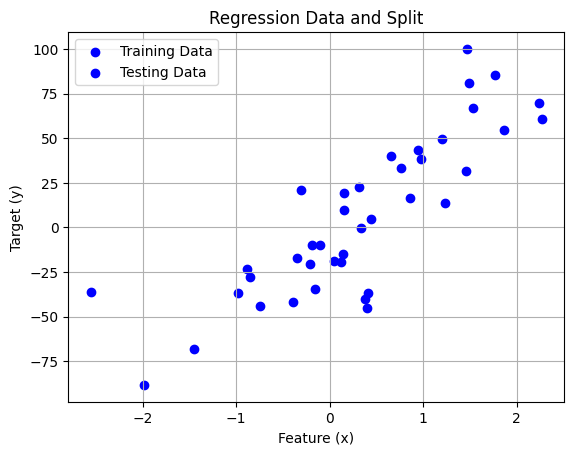

In [ ]:
# 시각화
plt.figure()

# 훈련 데이터 시각화
plt.scatter(x_train, y_train, color='blue', label='Training Data')

# 테스트 데이터 시각화
plt.scatter(x_test, y_test, color='blue', label='Testing Data')

# 그래프 꾸미기
plt.title('Regression Data and Split')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

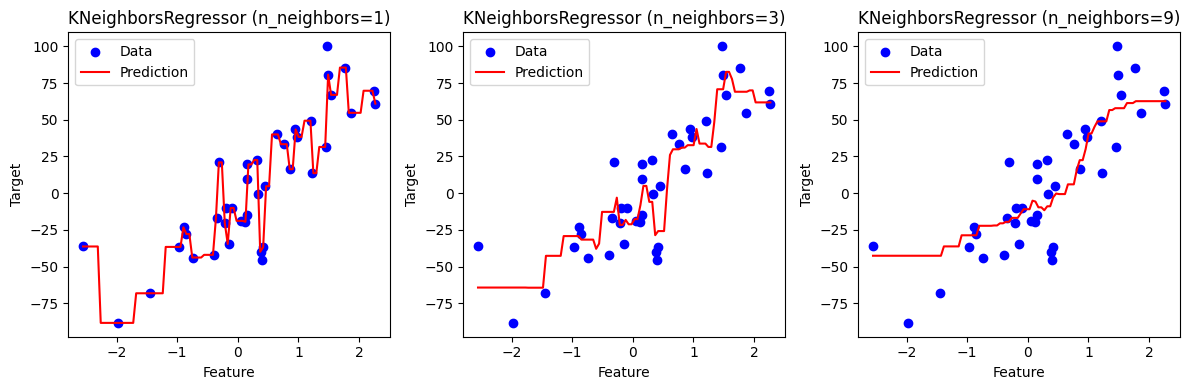

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# n_neighbors 값 리스트
n_neighbors_list = [1, 3, 9]

# 각 n_neighbors 값에 대한 회귀 예측 시각화
fig, axes = plt.subplots(1, len(n_neighbors_list), figsize=(12, 4))

for i, n_neighbors in enumerate(n_neighbors_list):
    # KNeighborsRegressor 모델 생성
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(x, y)

    # 예측 결과 시각화
    x_test = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_pred = knn_regressor.predict(x_test)

    axes[i].scatter(x, y, marker='o', c='b', label='Data')
    axes[i].plot(x_test, y_pred, color='r', label='Prediction')
    axes[i].set_title(f'KNeighborsRegressor (n_neighbors={n_neighbors})')
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Target')
    axes[i].legend()

plt.tight_layout()
plt.show()

## k값(n_neighbors)에 따른 변화
1~20 까지 변화

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error

# 데이터 생성
x, y = make_regression(n_samples=40, n_features=1, noise=30, random_state=0)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

rmse_val = [] #to store rmse values for different k
for k in range(20):
    k = k+1
    model = KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = np.sqrt(mean_squared_error(y_test, pred))
    rmse_val.append([k, error]) #store rmse values

rmse_df = pd.DataFrame(rmse_val, columns=['k', 'RMSE'])
rmse_df.set_index('k', inplace=True)
rmse_df.head(10)

,RMSE
k,
1,30.905692
2,29.591043
3,30.855386
4,29.636170
5,27.465257
6,27.143138
7,28.287065
8,27.756533
9,27.743160


<Axes: xlabel='k'>

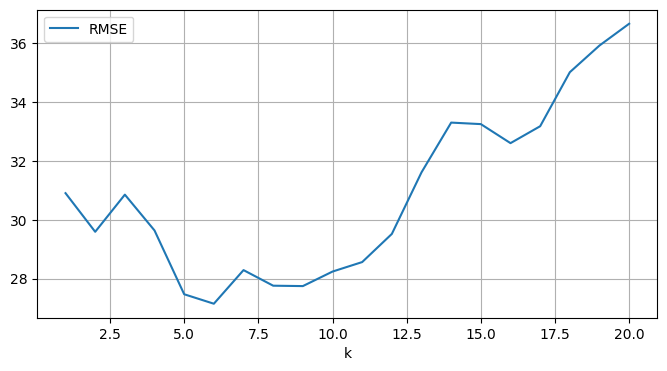

In [ ]:
rmse_df.plot(figsize=(8,4), grid=True)

----
**2019-2023 [FinanceData.KR]()**
